# Training Regression models

## Simple linear regression

As seen in previous lectures we need to import several packages

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

We are given a data set with a independent variable/feature x and a response value y. We try to find a linear function that predicts y as accurately as possible as a function of the independent variable x. 

In [44]:
df = pd.DataFrame({'col1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'col2': [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]})
df

,col1,col2
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7
5,5,8
6,6,8
7,7,9
8,8,10
9,9,12


As shown in the previous instruction session. Let's have a look at the data in a scatter plot.

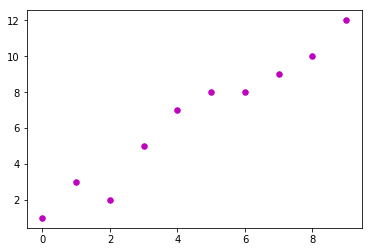

In [45]:
plt.scatter(df.col1, df.col2, color="m", marker="o", s=30) # s = marker size
plt.show()

Goal: we want to fit a linear function that describes the data in the best way possible. We use linear regression from the sklearn package.

In [46]:
#format the data such that the function can handle it
print(df.col1)
print(df.col2)
X = np.reshape([df.col1],(-1, 1))
y = np.reshape([df.col2],(-1, 1))
print(X)
print(y)

#define the classifier
classifier = LinearRegression()
#train the classifier
model = classifier.fit(X, y)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: col1, dtype: int64
0     1
1     3
2     2
3     5
4     7
5     8
6     8
7     9
8    10
9    12
Name: col2, dtype: int64
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[ 1]
 [ 3]
 [ 2]
 [ 5]
 [ 7]
 [ 8]
 [ 8]
 [ 9]
 [10]
 [12]]


Now we can use that classifier to predict y. We print the predictions as well as the coefficient and intercept of the linear function.

In [47]:
#use the classifier to make prediction
y_predict = np.array(classifier.predict(X))
print(y_predict)
#print coefficient and intercept
print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)

[[  1.23636364]
 [  2.40606061]
 [  3.57575758]
 [  4.74545455]
 [  5.91515152]
 [  7.08484848]
 [  8.25454545]
 [  9.42424242]
 [ 10.59393939]
 [ 11.76363636]]
Coefficients: 
 [[ 1.16969697]]
Intercept: 
 [ 1.23636364]


Let's visualize our regression function. Herefore we use the predicted values.

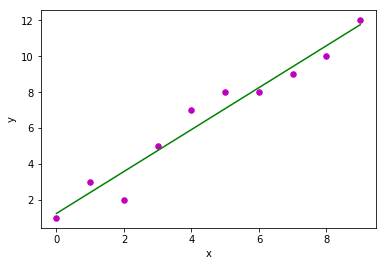

In [48]:
#visualize data points
plt.scatter(df.col1, df.col2, color = "m", marker = "o", s = 30) 
#visualize regression function
plt.plot(X, y_predict, color = "g") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show()

### <span style="color:green"> Now it is your turn. </span> Build a simple linear regression for the data below. Use col1 as independent variable and col2 as target feature. Also plot your results.

[[  2.66453526e-15]
 [  1.00000000e+00]
 [  2.00000000e+00]
 [  3.00000000e+00]
 [  4.00000000e+00]
 [  5.00000000e+00]
 [  6.00000000e+00]
 [  7.00000000e+00]
 [  8.00000000e+00]
 [  9.00000000e+00]]
Coefficients: 
 [[ 1.16969697]]
Intercept: 
 [ 1.23636364]


[]

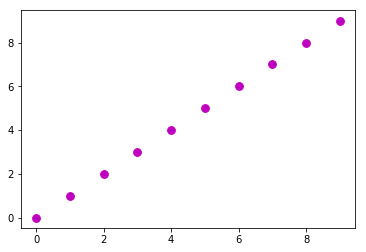

In [49]:
df2 = pd.DataFrame({'col1': [770, 677, 428, 410, 371, 504, 1136, 695, 551, 550], 'col2': [54, 47, 28, 38, 29, 38, 80, 52, 45, 40]})
#your turn
X = np.reshape(df['col1'].values, (-1, 1))
y = np.reshape(df['col1'].values, (-1, 1))
lin_clf = LinearRegression()
model = lin_clf.fit(X, y)

y_predict = np.array(model.predict(X))
print(y_predict)
#print coefficient and intercept
print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)

plt.scatter(X, y, color='m', s=60)
plt.plot()

In [50]:
y

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

But the model and its predictions is often not enough. Let's also compute their error. The sklearn.metrics package contains several errors such as

* Mean squared error
* Mean absolute error
* Mean squared log error
* Median absolute error


In [51]:
print("Mean squared error: %.2f" % mean_squared_error(y, y_predict))

Mean squared error: 0.00


We can also visualize our squared errors

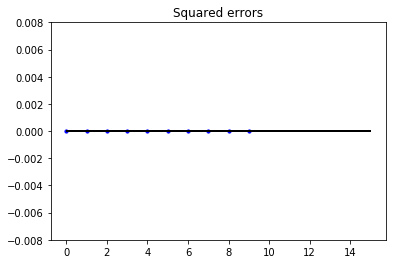

In [52]:
plt.scatter(y_predict, (y - y_predict) ** 2, color = "blue", s = 10,) 
  
## plotting line for zero error 
plt.hlines(y = 0, xmin = 0, xmax = 15, linewidth = 2) 
  
## plot title 
plt.title("Squared errors") 
  
## function to show plot 
plt.show() 

### <span style="color:green"> Now it is your turn. </span> Compute the mean squared error and visualize the squared errors. Play around using different error metrics.

In [53]:
#Your turn

## Handling multiple independent variables at once
In most cases, we will have more than one independent variable . There can be as little as two independent variables and up to hundreds of variables. As an example we use an example data set of the scikit package. The dataset describes housing prices in Boston based on several attributes.

In [54]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston()

To predict the housing price we will use a Multiple Linear Regression model. In Python this is very straightforward: we use the same function as for simple linear regression but our variable X consists of multiple columns.

In [55]:
X = data.data
y = data.target

classifier2 = LinearRegression()
model2 = classifier2.fit(X,y)

y_predict2 = classifier2.predict(X)
print(y_predict2[0:5])

print('Coefficients: \n', classifier2.coef_)
print('Intercept: \n', classifier2.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y, y_predict2))

[ 30.00821269  25.0298606   30.5702317   28.60814055  27.94288232]
Coefficients: 
 [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
Intercept: 
 36.4911032804
Mean squared error: 21.90


## Handling categorical independent variables 
So far we always encountered numerical independent variables, but data sets can also contain categorical attributes. The regression function can only handle numerical input. Therefore we need to tranform our data using one-hot encoding as explained in the lecture: we introduce a 0/1 feature for every possible value of our categorical attribute.

There are two popular possibilities to achieve this

* the get_dummies function of pandas
* the OneHotEncoder of scikit

After encoding the attributes we can apply our regular regression function.

In [56]:
#example using pandas

df = pd.DataFrame({'A':['a','b','c'],'B':['c','b','a'] })
one_hot_pd = pd.get_dummies(df)
one_hot_pd

,A_a,A_b,A_c,B_a,B_b,B_c
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,1,0,0


In [57]:
#example using scikit
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
# encode labels with value between 0 and n_classes-1.
df2 = df.apply(le.fit_transform)
df2.head()

encoder = OneHotEncoder(categories='auto')
encoder.fit(df2)

onehotlabels = encoder.transform(df2).toarray()
onehotlabels

TypeError: __init__() got an unexpected keyword argument 'categories'

### <span style="color:green"> Now it is your turn. </span>  Perform linear regression using the data set given below. Don't forget to transform your categorical independent variables. The rental price attribute represents the target variable. 

In [ ]:
#Your turn
data = pd.DataFrame({'Size':[500,550,620,630,665],'Floor':[4,7,9,5,8], 'Energy rating':['C', 'A', 'A', 'B', 'C'], 'Rental price': [320,380,400,390,385] })

## Predicting a categorical target value - Logistic regression

We might also encounter data sets where our target value is categorical. Here we don't transform them into numeric values, but we use a logistic regression function. Luckily, sklearn provides us with a suitable function that is similar to the linear equivalent. Similar to linear regression we can compute logistic regression on a single independent variable as well as multiple.
Regular logistic regression handles target variables with binary values, but the algorithm is also able

In [ ]:
# Importing the dataset
iris = pd.read_csv(r"C:\Users\syring\Documents\iris.csv", index_col = None)
X = iris.iloc[:,0:1] #we only use the first attribute
y = iris.iloc[:,-1]

from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression( solver = 'liblinear', multi_class = 'ovr')
classifier3.fit(X, y.ravel())

y_pred = classifier3.predict(X)
print(y_pred[0:5])

print('Coefficients: \n', classifier3.coef_)
print('Intercept: \n', classifier3.intercept_)

### <span style="color:green"> Now it is your turn. </span>  In the example above we only used the first attribute as independent variable. Change the example to be able to handle all available attributes. 

In [ ]:
#Your turn

# Training Support Vector Machines

Aside from regression models, the sklearn package also provides us with a function for training support vector machines. Looking at the example below we see that they can be trained in similar ways. We still use the iris data set for illustration.

In [ ]:
from sklearn.svm import SVC

X = iris.iloc[:,0:3] 
y = iris.iloc[:,-1]

classifier3 = SVC(C=1, kernel='linear', gamma = 'auto')
classifier3.fit(X, y)

y_pred2 = classifier3.predict(X)
y_pred2[0:5]


As explained in the lecture, a support vector machine is defined by its support vectors. In the sklearn package we can access them and their properties very easily.

* support_: indicies of support vectors
* support_vectors_: the support vectors
* n_support_: the number of support vectors for each class

In [ ]:
print(classifier3.support_)
print(classifier3.support_vectors_)
print(classifier3.n_support_)

We can also calculate the distance of the samples X to the separating hyperplane by using the decision_function(X) method. Score(X,y) calculates the mean accuracy of the classification. The classification report shows measures such as precision, recall, f1-score and support. You will learn more about these quality measures in a few lectures.

In [ ]:
from sklearn.metrics import classification_report
classifier3.decision_function(X)
print('Accuracy: \n', classifier3.score(X,y_pred2))
print(classification_report(y, y_pred2))  

The SVC has many parameters. In the lecture you learned about the concept of kernels. Scikit gives you the opportunity to try different kernel functions.
Furthermore, the parameter C tells the SVM optimization how much you want to avoid misclassifying each training example. 

### <span style="color:green"> Now it is your turn. </span>  Play around with the parameter settings of the SVM using the previous iris example. Which settings lead to good classifications? 
On the scikit website you can find more information about the available kernels etc. http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html